In [116]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..")))

import json
import os
import pandas as pd
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

root_path = os.path.join(os.path.dirname(os.getcwd()), "data", "BEPRO")
root_path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/root/exPress/PlayerImputer/data/BEPRO'

In [117]:
match_id_lst = [153381, 153387]
match_id = match_id_lst[1]

match_path = os.path.join(root_path, f'{match_id}')
os.listdir(match_path)

['153387_2_frame_data.jsonl',
 '153387_event',
 '153387_metadata.json',
 '153387_1_frame_data.jsonl',
 'info.txt']

In [120]:
df = pd.read_csv("./48833.csv")
df

,frame,session,time,phase,episode,player_code,event_types,ball_x,ball_y,ball_vx,...,H77_vx,H77_vy,H77_speed,H77_accel,H88_x,H88_y,H88_vx,H88_vy,H88_speed,H88_accel
0,0,1,0.1,1,0,NaN,NaN,51.909729,34.229043,0.0,...,-0.277583,0.281678,0.395467,-0.531977,51.815259,49.591012,-0.285840,-0.394517,0.487184,-0.312170
1,1,1,0.2,1,0,NaN,NaN,51.909729,34.229043,0.0,...,-0.224531,0.269716,0.350942,-0.442674,51.787746,49.552739,-0.263088,-0.369472,0.453569,-0.373670
2,2,1,0.3,1,1,NaN,NaN,51.909729,34.229043,0.0,...,-0.167020,0.256748,0.306293,-0.340097,51.763387,49.517938,-0.238425,-0.342322,0.417170,-0.419643
3,3,1,0.4,1,1,NaN,NaN,51.909729,34.229043,0.0,...,-0.105052,0.242776,0.264530,-0.224245,51.742183,49.486611,-0.211849,-0.313068,0.378010,-0.450089
4,4,1,0.5,1,1,NaN,NaN,51.909729,34.229043,0.0,...,-0.038625,0.227798,0.231050,-0.095120,51.724134,49.458756,-0.183362,-0.281709,0.336127,-0.465008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57227,57227,2,2891.7,9,0,NaN,NaN,109.200000,34.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57228,57228,2,2891.8,9,0,NaN,NaN,109.200000,34.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57229,57229,2,2891.9,9,0,NaN,NaN,109.200000,34.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57230,57230,2,2892.0,9,0,NaN,NaN,109.200000,34.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
with open(".", 'r', encoding='utf-8') as f:
    # json.load() parses the JSON data from the file object.
    data = json.load(f)

In [128]:
df.columns[180:]

Index(['H27_accel', 'H29_x', 'H29_y', 'H29_vx', 'H29_vy', 'H29_speed',
       'H29_accel', 'H31_x', 'H31_y', 'H31_vx', 'H31_vy', 'H31_speed',
       'H31_accel', 'H77_x', 'H77_y', 'H77_vx', 'H77_vy', 'H77_speed',
       'H77_accel', 'H88_x', 'H88_y', 'H88_vx', 'H88_vy', 'H88_speed',
       'H88_accel'],
      dtype='object')

In [106]:
def load_single_json(file_path):
    """
    Loads and parses a single JSON file from the specified path.

    Args:
        file_path (str): The path to the JSON file to load.

    Returns:
        dict or list or None: The parsed Python object on success.
                              Returns None if the file is not found or
                              is not valid JSON.
    """
    try:
        # Open the file in read mode ('r') with UTF-8 encoding.
        # Using 'with' ensures the file is automatically closed after use.
        with open(file_path, 'r', encoding='utf-8') as f:
            # json.load() parses the JSON data from the file object.
            data = json.load(f)
            print(f"Successfully loaded file: '{file_path}'")
            return data
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
        return None
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from '{file_path}'. Check format.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while reading '{file_path}': {e}")
        return None

meta_data_path = f"{match_path}/{match_id}_metadata.json"
meta_data = load_single_json(meta_data_path)
for key, value in meta_data.items():
    print(f"{key} : {value}")

Successfully loaded file: '/root/exPress/PlayerImputer/data/BEPRO/153387/153387_metadata.json'
match_id : 153387
match_title : 울산 HD FC vs 수원FC
match_datetime : 2024-11-23T14:00:00+0900
match_full_time : 5400000
match_extra_time : None
periods : [{'period_name': '1st Half', 'period_order': 0, 'period_match_duration': 2700000}, {'period_name': '2nd Half', 'period_order': 1, 'period_match_duration': 2700000}]
home_team : {'team_id': 2354, 'team_name': '울산 HD FC', 'team_name_en': 'Ulsan HD FC', 'players': [{'player_id': 500152, 'team_id': 2354, 'shirt_number': '70', 'full_name': '최강민', 'full_name_en': 'Kangmin Choi', 'initial_position_name': 'RB', 'is_starting': False}, {'player_id': 500153, 'team_id': 2354, 'shirt_number': '95', 'full_name': '마테우스', 'full_name_en': 'Matheus Sales', 'initial_position_name': None, 'is_starting': False}, {'player_id': 500150, 'team_id': 2354, 'shirt_number': '33', 'full_name': '강민우', 'full_name_en': 'Min Kang', 'initial_position_name': 'CB', 'is_starting': 

In [107]:
pd.DataFrame(meta_data["home_team"])["players"].iloc[0]

{'player_id': 500152,
 'team_id': 2354,
 'shirt_number': '70',
 'full_name': '최강민',
 'full_name_en': 'Kangmin Choi',
 'initial_position_name': 'RB',
 'is_starting': False}

In [108]:
def create_team_dataframe(home_team_info, away_team_info):
    home_team_rows = []
    base_info = {
            'player': None,
            'position': None,
            'team': 'Home',
            'jID': None,
            'pID': None,
            'tID': home_team_info.get('team_id'),
            'xID': None,  
            'is_starting': None 
        }
    for idx, player_data in enumerate(home_team_info['players']):
        player_info = base_info.copy()
        player_info['player'] = player_data['full_name_en']
        player_info['position'] = player_data['initial_position_name']
        player_info['jID'] = player_data['shirt_number']
        player_info['pID'] = player_data['player_id']
        player_info['xID'] = idx
        player_info['is_starting'] = player_data['is_starting']
        home_team_rows.append(player_info)

    home_df = pd.DataFrame(home_team_rows)

    away_team_rows = []
    base_info['team'] = 'Away'
    base_info['tID'] = away_team_info.get('team_id')
    for idx, player_data in enumerate(away_team_info['players']):
        player_info = base_info.copy()
        player_info['player'] = player_data['full_name_en']
        player_info['position'] = player_data['initial_position_name']
        player_info['jID'] = player_data['shirt_number']
        player_info['pID'] = player_data['player_id']
        player_info['xID'] = idx
        player_info['is_starting'] = player_data['is_starting']
        away_team_rows.append(player_info)

    away_df = pd.DataFrame(away_team_rows)

    return {'Home': home_df, 'Away': away_df}

teams_dict = create_team_dataframe(meta_data['home_team'], meta_data['away_team'])
team_sheets = pd.concat([teams_dict["Home"], teams_dict["Away"]]).reset_index(drop=True)
team_sheets

,player,position,team,jID,pID,tID,xID,is_starting
0,Kangmin Choi,RB,Home,70,500152,2354,0,False
1,Matheus Sales,None,Home,95,500153,2354,1,False
2,Min Kang,CB,Home,33,500150,2354,2,True
3,Chungyong Lee,LW,Home,27,150851,2354,3,False
4,Jihyun Kim,CAM,Home,96,187292,2354,4,True
5,Minhyeok Kim,CM,Home,22,344560,2354,5,True
6,Seungbeom Ko,None,Home,7,500145,2354,6,False
7,Seokho Hwang,CB,Home,20,500147,2354,7,True
8,Minwoo Kim,CAM,Home,10,500146,2354,8,False
9,Juhwan Kim,RB,Home,23,500148,2354,9,True


In [109]:
event_data_path = next((f for f in os.listdir(match_path) if "Event" in f), None)
new_path_name = f"{match_id}_event"
if event_data_path and event_data_path != f"{match_id}_event":
    os.rename(f"{match_path}/{event_data_path}", f"{match_path}/{new_path_name}")
else:
    event_data_path = os.path.join(match_path, new_path_name)

event_data_path

'/root/exPress/PlayerImputer/data/BEPRO/153387/153387_event'

In [110]:
# 1. event_time: milisecond -> seconds. milisecond * 0.001, 전후반 시작할 때 0초하도록 할건지는 DFL데이터랑 비교해서 
# 2. events'event_name -> event_type으로 변환(대략), 애매한 것들은 미루님 판단하에 제거 or 변환
# 3. x, y, to_x, to_y -> start_x, start_y, related_x, related_y으로 변환
# 4. attack_direction에 맞춰서 시각화
# 5. 시각화 돌아게끔
event_data_path = os.path.join(match_path, f'{match_id}_event')

first_half_event_path =  next((f for f in os.listdir(event_data_path) if "1st" in f), None)
second_half_event_path =  next((f for f in os.listdir(event_data_path) if "2nd" in f), None)

first_half_event_data = load_single_json(f"{event_data_path}/{first_half_event_path}")
second_half_event_data = load_single_json(f"{event_data_path}/{second_half_event_path}")

event_data = pd.concat([pd.DataFrame(first_half_event_data["data"]), pd.DataFrame(second_half_event_data["data"])])
event_data

Successfully loaded file: '/root/exPress/PlayerImputer/data/BEPRO/153387/153387_event/2024-11-23_Ulsan HD FC vs SuwonFC_1st Half.json'
Successfully loaded file: '/root/exPress/PlayerImputer/data/BEPRO/153387/153387_event/2024-11-23_Ulsan HD FC vs SuwonFC_2nd Half.json'


,period_type,period_name,period_order,period_duration,period_start_time,event_time,team_name,player_shirt_number,player_name,events,x,y,to_x,to_y,attack_direction
0,Half,1st Half,0,2700000,0,400,Ulsan HD FC,8,Gyusung Lee,"[{'event_name': 'Passes', 'property': {'Outcom...",0.5002,0.5086,0.6977,0.5919,LEFT
1,Half,1st Half,0,2700000,0,1508,Ulsan HD FC,99,Yago Cariello,"[{'name': 'VHIR', 'property': {'duration': 200...",0.4734,0.2997,0.3649,0.3010,LEFT
2,Half,1st Half,0,2700000,0,2467,Ulsan HD FC,33,Min Kang,"[{'event_name': 'Passes Received', 'property':...",0.6977,0.5919,NaN,NaN,LEFT
3,Half,1st Half,0,2700000,0,8933,Ulsan HD FC,33,Min Kang,"[{'event_name': 'Passes', 'property': {'Outcom...",0.5806,0.6318,0.4343,0.9055,LEFT
4,Half,1st Half,0,2700000,0,10008,Suwon FC,70,Anderson Oliveira,"[{'name': 'VHIR', 'property': {'duration': 200...",0.4811,0.6723,0.4015,0.7964,RIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Half,2nd Half,1,2700000,2700000,5875028,Ulsan HD FC,31,Ataru Esaka,"[{'name': 'SPRINT', 'property': {'duration': 1...",0.4752,0.9522,0.5434,0.9352,RIGHT
2085,Half,2nd Half,1,2700000,2700000,5876028,Ulsan HD FC,31,Ataru Esaka,"[{'name': 'VHIR', 'property': {'duration': 500...",0.5434,0.9352,0.5774,0.9281,RIGHT
2086,Half,2nd Half,1,2700000,2700000,5876567,Suwon FC,21,Yunho Kwak,"[{'event_name': 'Recoveries', 'property': {}},...",0.6005,0.9491,0.5869,0.9419,LEFT
2087,Half,2nd Half,1,2700000,2700000,5876700,Ulsan HD FC,31,Ataru Esaka,"[{'event_name': 'Blocks', 'property': {}}]",0.5923,0.9432,NaN,NaN,RIGHT


In [111]:
event_data[event_data["events"].apply(lambda x: len(x) > 1)]

,period_type,period_name,period_order,period_duration,period_start_time,event_time,team_name,player_shirt_number,player_name,events,x,y,to_x,to_y,attack_direction
8,Half,1st Half,0,2700000,0,14833,Ulsan HD FC,22,Minhyeok Kim,"[{'event_name': 'Passes', 'property': {'Outcom...",0.3892,0.7527,0.3840,0.8148,LEFT
11,Half,1st Half,0,2700000,0,17500,Ulsan HD FC,33,Min Kang,"[{'event_name': 'Passes', 'property': {'Outcom...",0.4942,0.8970,0.4165,0.9831,LEFT
19,Half,1st Half,0,2700000,0,30767,Ulsan HD FC,23,Juhwan Kim,"[{'event_name': 'Set Pieces', 'property': {'Ty...",0.2060,1.0000,0.2187,0.9232,LEFT
20,Half,1st Half,0,2700000,0,31667,Ulsan HD FC,9,Giorgi Arabidze,"[{'event_name': 'Passes', 'property': {'Outcom...",0.2187,0.9232,0.2320,0.9995,LEFT
21,Half,1st Half,0,2700000,0,32367,Ulsan HD FC,23,Juhwan Kim,"[{'event_name': 'Passes', 'property': {'Outcom...",0.2320,0.9995,0.1160,0.8808,LEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Half,2nd Half,1,2700000,2700000,5857267,Suwon FC,77,Sangyoon Kang,"[{'event_name': 'Passes', 'property': {'Outcom...",0.2925,0.5012,0.3127,0.4236,LEFT
2069,Half,2nd Half,1,2700000,2700000,5861967,Suwon FC,14,Bitgaram Yoon,"[{'event_name': 'Crosses', 'property': {'Outco...",0.2573,0.2975,0.0862,0.5826,LEFT
2073,Half,2nd Half,1,2700000,2700000,5865700,Ulsan HD FC,10,Minwoo Kim,"[{'event_name': 'Recoveries', 'property': {}},...",0.0469,0.7072,NaN,NaN,RIGHT
2081,Half,2nd Half,1,2700000,2700000,5873033,Ulsan HD FC,31,Ataru Esaka,"[{'event_name': 'Take-on', 'property': {'Outco...",0.3978,0.9677,NaN,NaN,RIGHT


In [112]:
event_data.loc[1921]["events"]

[{'name': 'VHIR', 'property': {'duration': 1000, 'distance': 5.5672}}]

In [113]:
def load_jsonl(file_path):
    """
    Loads data from a JSON Lines (.jsonl) file.

    Each line in the file is expected to be a valid JSON object.
    Lines that are empty or cannot be parsed as JSON will be skipped with a warning.

    Args:
        file_path (str): The path to the .jsonl file.

    Returns:
        list: A list containing the Python objects parsed from each valid JSON line.
              Returns an empty list if the file is not found or contains no valid JSON lines.
    """
    data = [] # To store the parsed JSON objects from each line
    try:
        # Open the file in read mode ('r') with UTF-8 encoding.
        # 'with' ensures the file is closed automatically.
        with open(file_path, 'r', encoding='utf-8') as f:
            # Iterate through each line in the file.
            # enumerate adds line numbers (starting from 1) for better error reporting.
            for line_number, line in enumerate(f, 1):
                # Remove leading/trailing whitespace (including the newline character \n)
                processed_line = line.strip()

                # Skip empty lines
                if not processed_line:
                    continue

                try:
                    # Parse the current line (which is a string) into a Python object.
                    # Use json.loads() for parsing a string, not json.load().
                    parsed_object = json.loads(processed_line)
                    data.append(parsed_object)
                except json.JSONDecodeError:
                    # Handle lines that are not valid JSON.
                    print(f"Warning: Skipping line {line_number} in '{file_path}' due to JSON decoding error.")
                    # Optional: Print the problematic line for debugging
                    # print(f"         Problematic line content: {processed_line[:100]}...")
                except Exception as e:
                    # Handle any other unexpected errors during line processing
                    print(f"Warning: An unexpected error occurred processing line {line_number} in '{file_path}': {e}. Skipping line.")

    except FileNotFoundError:
        # Handle the case where the file itself doesn't exist.
        print(f"Error: File not found at '{file_path}'")
    except Exception as e:
        # Handle other potential errors during file opening or reading (outside the line loop).
        print(f"An error occurred while reading the file '{file_path}': {e}")

    # Return the list of successfully parsed objects.
    return data

first_half_tracking_data = load_jsonl(f"{match_path}/{match_id}_1_frame_data.jsonl")
second_half_tracking_data = load_jsonl(f"{match_path}/{match_id}_2_frame_data.jsonl")
first_half_tracking_data[0]

{'period_order': 0,
 'match_time': 8,
 'frame_index': 0,
 'ball_state': None,
 'players': [{'object': 'PLAYER',
   'player_id': 142109,
   'x': 97.7652,
   'y': 32.7573,
   'speed': 0.3399},
  {'object': 'PLAYER',
   'player_id': 144570,
   'x': 52.7823,
   'y': 5.9229,
   'speed': 0.9683},
  {'object': 'PLAYER',
   'player_id': 187292,
   'x': 53.1364,
   'y': 21.9236,
   'speed': 0.2457},
  {'object': 'PLAYER',
   'player_id': 250037,
   'x': 52.2925,
   'y': 34.4597,
   'speed': 0.0145},
  {'object': 'PLAYER',
   'player_id': 287282,
   'x': 32.4389,
   'y': 14.8737,
   'speed': 0.0001},
  {'object': 'PLAYER',
   'player_id': 344560,
   'x': 62.1901,
   'y': 33.5112,
   'speed': 0.0001},
  {'object': 'PLAYER',
   'player_id': 354809,
   'x': 41.2333,
   'y': 55.3293,
   'speed': 0.0286},
  {'object': 'PLAYER',
   'player_id': 354812,
   'x': 41.7188,
   'y': 27.4308,
   'speed': 0.2564},
  {'object': 'PLAYER',
   'player_id': 354820,
   'x': 32.7203,
   'y': 37.297,
   'speed': 0.44

In [114]:
def create_tracking_dataframe(match_path, teams_dict):
    match_id = match_path.split("/")[-1]
    first_half_tracking_data = load_jsonl(f"{match_path}/{match_id}_1_frame_data.jsonl")
    second_half_tracking_data = load_jsonl(f"{match_path}/{match_id}_2_frame_data.jsonl")

    all_object_rows = []

    for half_tracking_data in [first_half_tracking_data, second_half_tracking_data]:
        for frame_data in tqdm(half_tracking_data):
            # Check ball state
            ball_state = frame_data.get('ball_state')
            if ball_state is None or ball_state == 'out':
                new_ball_state = 'dead'
                ball_owning_team_id = None
            else:
                new_ball_state = 'alive'
                if ball_state == 'home':
                    ball_owning_team_id = teams_dict['Home']['tID'].iloc[0]
                elif ball_state == 'away':
                    ball_owning_team_id = teams_dict['Away']['tID'].iloc[0]
                else:
                    ball_owning_team_id = ball_state

            # 2. Extract current frames base information.
            frame_info = {
                'game_id': match_id,
                'period_id': frame_data.get('period_order') + 1,
                'match_time': frame_data.get('match_time'),
                'frame_id': frame_data.get('frame_index'),
                'ball_state': new_ball_state,
                'ball_owning_team_id': ball_owning_team_id,
            }

            for object in ['players', 'balls']:
                object_list = frame_data.get(object, [])
                if object_list:
                    for object_data in object_list:
                        row_data = frame_info.copy()
                        row_data.update(object_data)
                        if object == 'balls':
                            row_data['id'] = 'ball'
                        else:
                            row_data['id'] = row_data['player_id']
                        row_data.pop('object')
                        row_data.pop('player_id')
                        all_object_rows.append(row_data)

    tracking_df = pd.DataFrame(all_object_rows)
    return tracking_df

tracking_data = create_tracking_dataframe(match_path, teams_dict)
tracking_data.head()

  0%|          | 0/88361 [00:00<?, ?it/s]

  0%|          | 0/95301 [00:00<?, ?it/s]

,game_id,period_id,match_time,frame_id,ball_state,ball_owning_team_id,x,y,speed,id
0,153387,1,8,0,dead,None,97.7652,32.7573,0.3399,142109
1,153387,1,8,0,dead,None,52.7823,5.9229,0.9683,144570
2,153387,1,8,0,dead,None,53.1364,21.9236,0.2457,187292
3,153387,1,8,0,dead,None,52.2925,34.4597,0.0145,250037
4,153387,1,8,0,dead,None,32.4389,14.8737,0.0001,287282


In [115]:
# 1. fps=33 -> 25hz으로 변환해야한다. -> interpolation
# 2. x, y -> 공격 방향, 스케일에 맞게 조정
# 3. 이벤트 데이터의 위치랑 싱크가 맞는지 확인
# 4. 속도 스무딩해서 vx, vy계산
# 5. 시각화 돌아가게끔
tracking_data.groupby("frame_id").head(2)

,game_id,period_id,match_time,frame_id,ball_state,ball_owning_team_id,x,y,speed,id
0,153387,1,8,0,dead,None,97.7652,32.7573,0.3399,142109
1,153387,1,8,0,dead,None,52.7823,5.9229,0.9683,144570
22,153387,1,42,1,dead,None,97.7551,32.7630,0.3502,142109
23,153387,1,42,1,dead,None,52.7770,5.9545,0.9440,144570
44,153387,1,75,2,dead,None,97.7446,32.7685,0.3649,142109
...,...,...,...,...,...,...,...,...,...,...
4027147,153387,2,5876628,176299,alive,4220,8.7766,36.1466,1.0389,142109
4027169,153387,2,5876662,176300,alive,4220,21.4123,39.2019,1.4070,77711
4027170,153387,2,5876662,176300,alive,4220,8.8093,36.1582,1.0474,142109
4027192,153387,2,5876695,176301,alive,neutral,21.4588,39.2063,1.4094,77711


In [13]:
tracking_data.columns[60:]

Index([], dtype='object')

In [14]:
from datatools.trace_snapshot import TraceSnapshot
from datatools.utils import compute_camera_coverage, is_inside
import PlayerImputer.imputer.config as config

In [15]:
team_lookup = {
    pid: f"{team[0]}{xid:02d}"
    for pid, team, xid in team_sheets[["pID", "team", "xID"]].values
}
team_lookup["ball"] = "Ball"
team_lookup

{500152: 'H00',
 500153: 'H01',
 500150: 'H02',
 150851: 'H03',
 187292: 'H04',
 344560: 'H05',
 500145: 'H06',
 500147: 'H07',
 500146: 'H08',
 500148: 'H09',
 250037: 'H10',
 144570: 'H11',
 530659: 'H12',
 61973: 'H13',
 250036: 'H14',
 500143: 'H15',
 534721: 'H16',
 250054: 'H17',
 142109: 'H18',
 344559: 'H19',
 500543: 'A00',
 500547: 'A01',
 287282: 'A02',
 500552: 'A03',
 354809: 'A04',
 188185: 'A05',
 529744: 'A06',
 500530: 'A07',
 500534: 'A08',
 77715: 'A09',
 252492: 'A10',
 354820: 'A11',
 532195: 'A12',
 532196: 'A13',
 500549: 'A14',
 354812: 'A15',
 77711: 'A16',
 500554: 'A17',
 500539: 'A18',
 500533: 'A19',
 'ball': 'Ball'}

In [16]:
def preprocess_tracking_data(tracking_data):
    # Convert match_time to seconds and adjust for periods
    tracking_data["time_seconds"] = (
        tracking_data["match_time"] * 0.001
        - ((tracking_data.period_id > 1) * 45 * 60)
        - ((tracking_data.period_id > 2) * 45 * 60)
        - ((tracking_data.period_id > 3) * 15 * 60)
        - ((tracking_data.period_id > 4) * 15 * 60)
    )
    
    # Pre-group data by frame_id for faster access
    grouped = tracking_data.groupby("frame_id")
    
    # Initialize the result list
    tracking_df = []
    
    # Iterate over each frame_id group
    for frame_id, frame_df in tqdm(grouped):
        # Dictionary to store combined data for the current frame
        frame_data = {"frame_id": frame_id, "time_seconds": frame_df["time_seconds"].iloc[0],
                      "period_id": frame_df["period_id"].iloc[0], "ball_state": frame_df["ball_state"].iloc[0],
                      "ball_owning_team_id": frame_df["ball_owning_team_id"].iloc[0]}
        
        # Iterate over rows in the frame_df
        for row in frame_df.itertuples():
            xID = team_lookup.get(row.id, f"unknown_{row.id}")  # Handle missing IDs gracefully
            
            # Clip x and y coordinates to the specified ranges
            clipped_x = max(0, min(105, row.x))
            clipped_y = max(0, min(68, row.y))
            
            frame_data[f"{xID}_x"] = clipped_x
            frame_data[f"{xID}_y"] = clipped_y
            frame_data[f"{xID}_speed"] = row.speed
        
        # Append the combined data for the frame
        tracking_df.append(frame_data)
    
    # Convert the list of dictionaries into a DataFrame
    tracking_df = pd.DataFrame(tracking_df)
    return tracking_df

# Process the tracking data
tracking_data = preprocess_tracking_data(tracking_data)
tracking_data

  0%|          | 0/176302 [00:00<?, ?it/s]

,frame_id,time_seconds,period_id,ball_state,ball_owning_team_id,H18_x,H18_y,H18_speed,H11_x,H11_y,...,A17_speed,A18_x,A18_y,A18_speed,A16_x,A16_y,A16_speed,A05_x,A05_y,A05_speed
0,0,0.008,1,dead,None,97.7652,32.7573,0.3399,52.7823,5.9229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.042,1,dead,None,97.7551,32.7630,0.3502,52.7770,5.9545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.075,1,dead,None,97.7446,32.7685,0.3649,52.7716,5.9852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.108,1,dead,None,97.7336,32.7739,0.3697,52.7662,6.0149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.142,1,dead,None,97.7221,32.7790,0.3814,52.7605,6.0433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176297,176297,3176.562,2,alive,2354,8.7112,36.1260,1.0154,NaN,NaN,...,4.2866,22.8673,54.3305,2.2892,21.2725,39.1988,1.3811,62.9852,61.6361,5.0027
176298,176298,3176.595,2,alive,4220,8.7440,36.1358,1.0327,NaN,NaN,...,4.3116,22.9211,54.2757,2.3003,21.3191,39.1988,1.4027,63.0395,61.7916,4.8382
176299,176299,3176.628,2,alive,4220,8.7766,36.1466,1.0389,NaN,NaN,...,4.2724,22.9746,54.2218,2.2755,21.3657,39.1988,1.4039,63.0927,61.9389,4.5954
176300,176300,3176.662,2,alive,4220,8.8093,36.1582,1.0474,NaN,NaN,...,4.2309,23.0278,54.1688,2.2481,21.4123,39.2019,1.4070,63.1451,62.0779,4.3534


In [26]:
from datatools.preprocess import calc_player_velocities

tracking_data = calc_player_velocities(tracking_data, team_sheets)
tracking_data

,frame_id,time_seconds,period_id,ball_state,ball_owning_team_id,H18_x,H18_y,H18_speed,H11_x,H11_y,...,A17_speed,A18_vx,A18_vy,A18_speed,A16_vx,A16_vy,A16_speed,A05_vx,A05_vy,A05_speed
0,0,0.008,1,dead,None,97.7652,32.7573,0.3399,52.7823,5.9229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.042,1,dead,None,97.7551,32.7630,0.3502,52.7770,5.9545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.075,1,dead,None,97.7446,32.7685,0.3649,52.7716,5.9852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.108,1,dead,None,97.7336,32.7739,0.3697,52.7662,6.0149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.142,1,dead,None,97.7221,32.7790,0.3814,52.7605,6.0433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176297,176297,3176.562,2,alive,2354,8.7112,36.1260,1.0154,NaN,NaN,...,3.62,1.35,-1.38,1.93,1.16,0.01,1.16,1.40,4.06,4.30
176298,176298,3176.595,2,alive,4220,8.7440,36.1358,1.0327,NaN,NaN,...,3.59,1.34,-1.36,1.91,1.16,0.03,1.16,1.37,3.87,4.11
176299,176299,3176.628,2,alive,4220,8.7766,36.1466,1.0389,NaN,NaN,...,3.56,1.34,-1.34,1.90,1.16,0.04,1.16,1.34,3.67,3.91
176300,176300,3176.662,2,alive,4220,8.8093,36.1582,1.0474,NaN,NaN,...,3.53,1.33,-1.33,1.88,1.16,0.06,1.17,1.31,3.48,3.72


In [ ]:
team_sheets

,player,position,team,jID,pID,tID,xID,is_starting
0,Kangmin Choi,RB,Home,70,500152,2354,0,False
1,Matheus Sales,None,Home,95,500153,2354,1,False
2,Min Kang,CB,Home,33,500150,2354,2,True
3,Chungyong Lee,LW,Home,27,150851,2354,3,False
4,Jihyun Kim,CAM,Home,96,187292,2354,4,True
5,Minhyeok Kim,CM,Home,22,344560,2354,5,True
6,Seungbeom Ko,None,Home,7,500145,2354,6,False
7,Seokho Hwang,CB,Home,20,500147,2354,7,True
8,Minwoo Kim,CAM,Home,10,500146,2354,8,False
9,Juhwan Kim,RB,Home,23,500148,2354,9,True


not exist ball trajectory


(<Figure size 2080x1440 with 1 Axes>, <Axes: >)

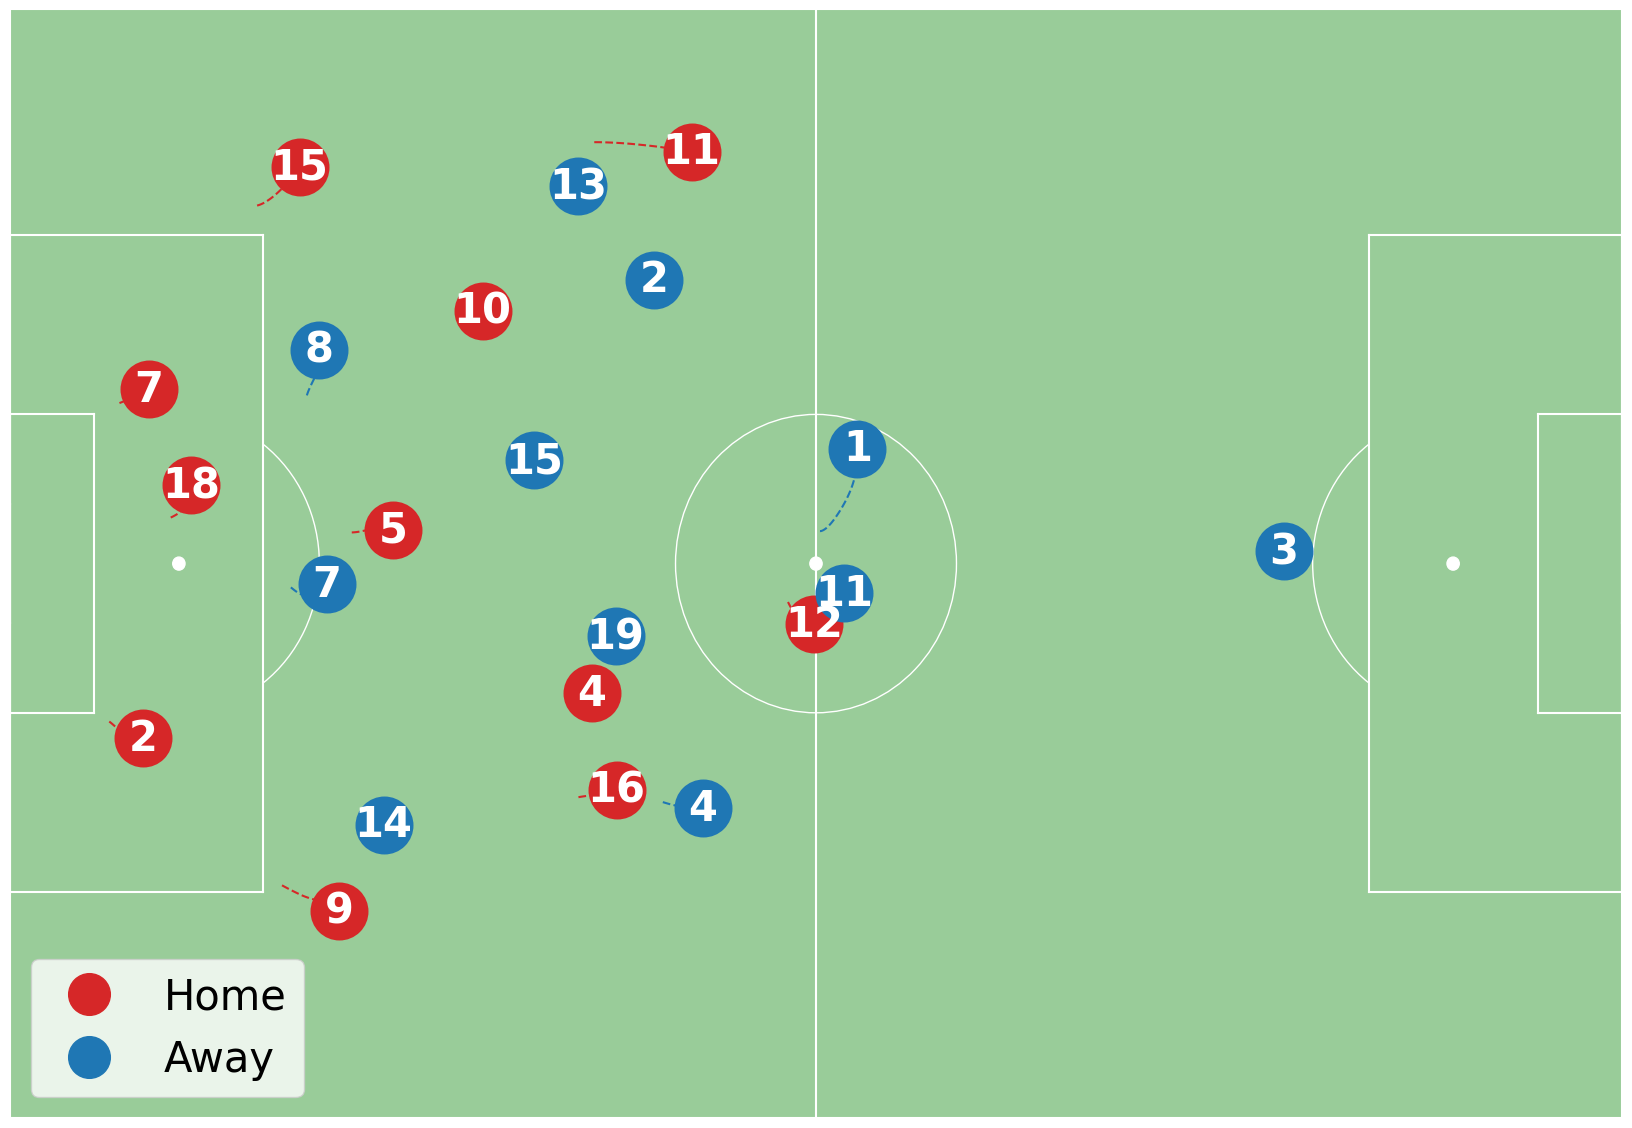

In [ ]:
before_maigin = 1
after_margin = 1

period_id = 1
time_seconds = 340
trace = tracking_data[
    (tracking_data["period_id"] == period_id) & 
    (tracking_data["time_seconds"] >= time_seconds - before_maigin) & 
    (tracking_data["time_seconds"] <= time_seconds + after_margin)]

# visible_area = compute_camera_coverage(np.array([[highlight.start_x, highlight.start_y]]), 
#                                        camera_info=(0, -20, 20, 30),
#                                        pitch_size=(config.field_length, config.field_width))
# print("visible_area: ", visible_area)

snapshot = TraceSnapshot(trace, visible_area=None, play_left_to_right=True)
snapshot.plot()